<img src="http://i68.tinypic.com/iwum1i.png" width="500">

My API key is P5QB6NHSG9CPFQF1

In [36]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.sectorperformance import SectorPerformances
from alpha_vantage.cryptocurrencies import CryptoCurrencies
from alpha_vantage.foreignexchange import ForeignExchange
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
#from pandas_datareader import data

I use AK steal as an example here. It's the pennby stock Robinhood gave me for free. 

Let's have a look at the raw data and its meta data first:

In [154]:
def PlotPriceVolume(price_seq, meta_data, display_interval = 100):
    title = meta_data['2. Symbol'] + ", " + meta_data['4. Interval']
    fig, ax = plt.subplots(nrows=2)
    print("price_seq['5. volume']:", price_seq['5. volume'])
    price_seq['1. open'].plot(ax=ax[0], figsize=(40, 16), fontsize=25, title = title)
    price_seq['5. volume'].plot(kind='bar', ax=ax[1], figsize=(40, 16), fontsize=25)
    ax[0].title.set_size(30)
    ax[0].set_ylabel('price(USD)', fontsize=30)
    ax[1].set_ylabel('volume(shares)', fontsize=30)
    ax[1].set_xlabel('time', fontsize=30)
    locs, labels = plt.xticks()
    time_point = list(price_seq.index)
    plt.xticks(locs[::display_interval],time_point[::display_interval])
    fig.autofmt_xdate()
    plt.show()
    
def BollingerBands(price_seq, meta_data):
    symbol = meta_data['2. Symbol']
    interval = meta_data['4. Interval']
    ti = TechIndicators(key='P5QB6NHSG9CPFQF1', output_format='pandas')
    BB, meta_data = ti.get_bbands(symbol=symbol, interval=interval, time_period=30)
    title = "Bollingerbands for "+ symbol + ", " + interval
    BB.plot(figsize=(40, 16), fontsize=25)
    plt.title(title, fontsize=30)
    plt.xlabel('time', fontsize=30)
    plt.ylabel('price(USD)', fontsize=30)
    plt.show()
    
def GetStockData(symbol, interval, key='P5QB6NHSG9CPFQF1', peep=1, plot=1, BB=1):
    ts = TimeSeries(key=key, output_format='pandas')
    price_seq, meta_data = ts.get_intraday(symbol=symbol,interval=interval, outputsize='full')
    if peep == 1:
        print("Data sequence length:", len(price_seq), '\n')
        print("Meta data: ", meta_data, '\n')
        print("Begining market:", '\n', price_seq.head(3), '\n')
        print("Current market:", '\n', price_seq.tail(3), '\n')
    if plot == 1:
        PlotPriceVolume(price_seq = price_seq, meta_data = meta_data)
    if BB == 1:
        BollingerBands(price_seq, meta_data)
    return price_seq, meta_data

In [155]:
price_seq, meta_data = GetStockData(symbol='AKS',interval='60min', peep=0, plot=0, BB=0)

Now let's start machine learning: ୧⍢⃝୨

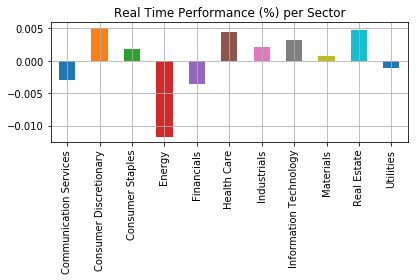

In [145]:
def Sector():
    sp = SectorPerformances(key='P5QB6NHSG9CPFQF1', output_format='pandas')
    data, meta_data = sp.get_sector()
    data['Rank A: Real-Time Performance'].plot(kind='bar')
    plt.title('Real Time Performance (%) per Sector')
    plt.tight_layout()
    plt.grid()
    plt.show()
Sector()

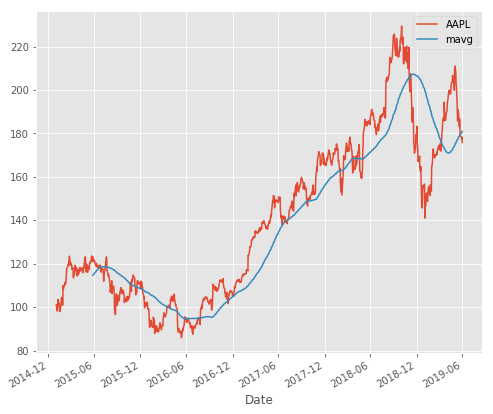

In [16]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl

start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2019, 5, 31)

df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()

close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()


mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

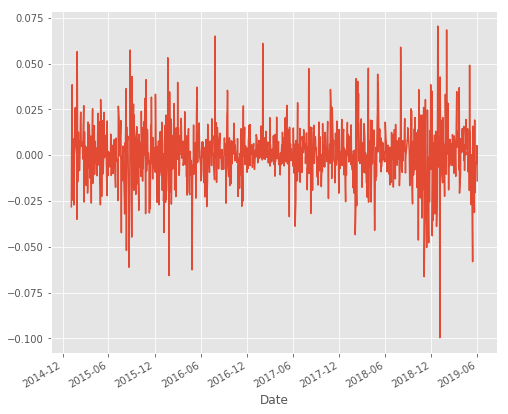

In [17]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

In [22]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']
dfcomp.tail()

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2019-05-24,178.970001,9.450,1133.469971,132.279999,126.239998
2019-05-28,178.229996,9.360,1134.150024,130.460007,126.160004
2019-05-29,177.380005,9.370,1116.459961,129.690002,124.940002
2019-05-30,178.300003,9.470,1117.949951,129.570007,125.730003
2019-05-31,175.330002,9.385,1104.390015,127.099998,123.675003


In [23]:
retscomp = dfcomp.pct_change()

corr = retscomp.corr()
corr

Symbols,AAPL,GE,GOOG,IBM,MSFT
Symbols,,,,,
AAPL,1.000000,0.257163,0.520277,0.386761,0.570081
GE,0.257163,1.000000,0.253388,0.361761,0.268957
GOOG,0.520277,0.253388,1.000000,0.407256,0.661508
IBM,0.386761,0.361761,0.407256,1.000000,0.478723
MSFT,0.570081,0.268957,0.661508,0.478723,1.000000


Text(0,0.5,'Returns GE')

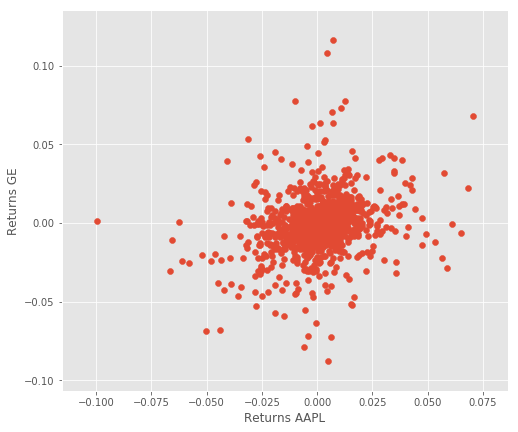

In [25]:
plt.scatter(retscomp.AAPL, retscomp.GE)
plt.xlabel('Returns AAPL')
plt.ylabel('Returns GE')

/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


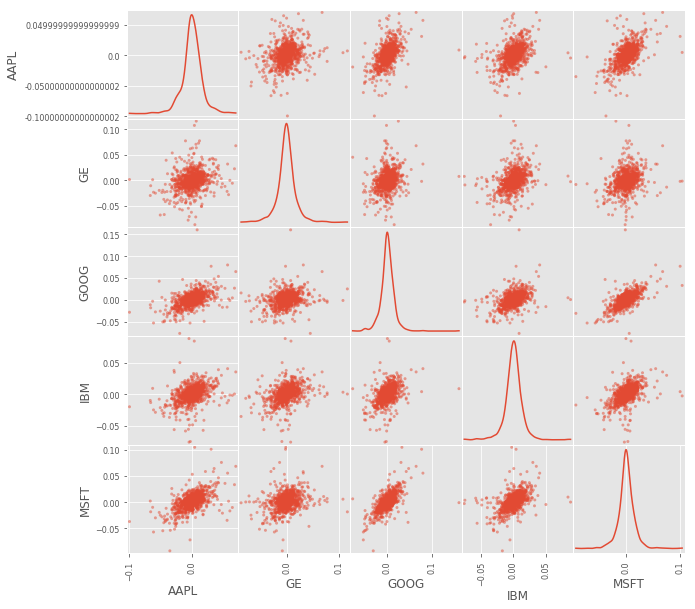

In [26]:
pd.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

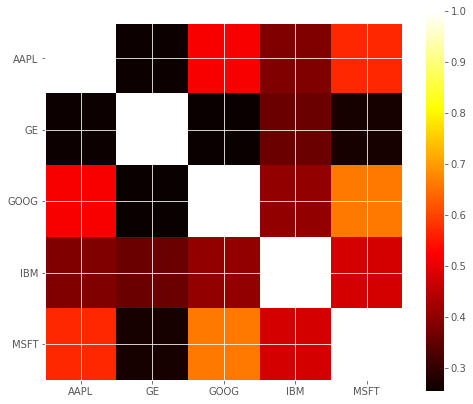

In [27]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

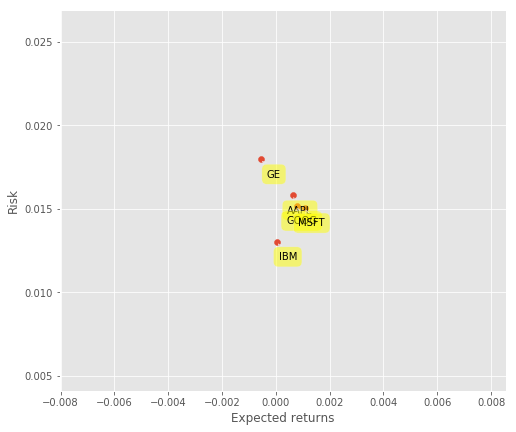

In [29]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [32]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

In [40]:
import math
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
# Drop missing value
dfreg.fillna(value=-99999, inplace=True)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))
# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]